## Librairies et Data

### Librairies

In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

import sys

# custom functions
import os

# Go up to the parent directory (the project folder)
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add this path to the sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

# import your function from the SRC directory
from SRC.Functions import display_dataframe_summary_cf, check_missing_values

pd.options.display.float_format = '{:.2f}'.format


# librairies versions
print("python version", sys.version[:6])
print("Pandas version", pd.__version__)
print("Numpy version", np.__version__)
print("Matplotlib version", mpl.__version__)
print("Seaborn version", sns.__version__)

python version 3.13.2
Pandas version 2.3.3
Numpy version 2.3.4
Matplotlib version 3.10.7
Seaborn version 0.13.2


### Data

In [2]:
# Load the dataset
data = pd.read_csv('../DATA/athlete_events.xls')

df = data.copy()

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
missing_count = df.isnull().sum()
missing_count

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
len(df)

271116

In [6]:
 # Calcul du nombre total de valeurs manquantes par colonne
missing_count = df.isnull().sum()
    
# Calcul du pourcentage de valeurs manquantes par colonne
total_rows = len(df)
missing_percentage = (missing_count / total_rows) * 100

# Création du DataFrame récapitulatif
missing_data = pd.DataFrame({
    'nombre_valeurs_manquantes': missing_count,
    'pourcentage_valeurs_manquantes': missing_percentage
})
missing_data

,nombre_valeurs_manquantes,pourcentage_valeurs_manquantes
ID,0,0.00
Name,0,0.00
Sex,0,0.00
Age,9474,3.49
Height,60171,22.19
Weight,62875,23.19
Team,0,0.00
NOC,0,0.00
Games,0,0.00
Year,0,0.00


### Etude de forme

#### Classique

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


- Dimensions

In [8]:
df.shape

(271116, 15)

- Types de variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


- Check valeurs manquantes

In [10]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

#### Fonction personnelle

- schéma code fonction personnelle

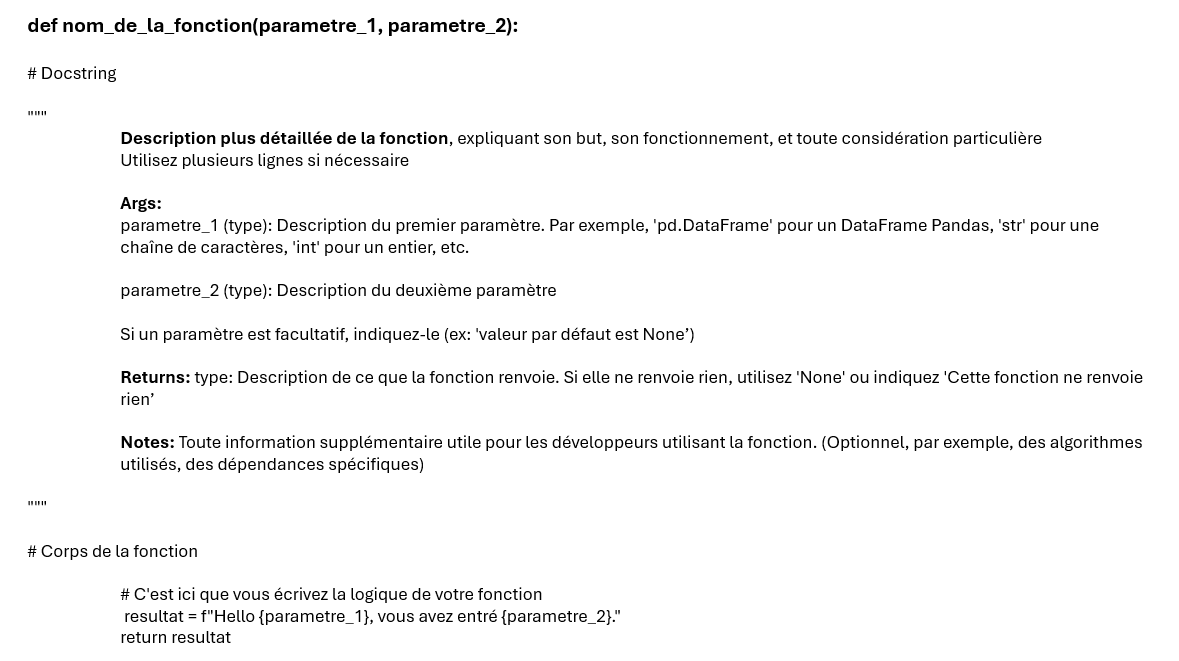

- Exemple code fonction personnelle pour étude de forme

In [11]:
def display_dataframe_summary(dataframe):
    """
    Affiche un résumé des informations clés d'un DataFrame
    
    """

    print("--- Dimensions du dataframe ---")
    print(f"{dataframe.shape[0]} lignes pour {dataframe.shape[1]} colonnes")
    
    
    print("\n--- Informations sur les colonnes ---")
    dataframe.info()

    print("\n--- Valeurs manquantes ---")
    print(dataframe.isnull().sum())

    return(dataframe.head())

In [12]:
display_dataframe_summary(df)

--- Dimensions du dataframe ---
271116 lignes pour 15 colonnes

--- Informations sur les colonnes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB

--- Valeurs manquantes ---
ID             0
Name           0
Sex            

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


- Utilisation fonction du fichier .py

In [13]:
display_dataframe_summary_cf(df)

--- Shape of the dataframe ---
271116 lignes pour 15 colonnes

--- Column information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB

--- Check missing values ---
ID             0
Name           0
Sex            0
Age     

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Conpréhension des variables

- **ID**: identifiant unique de chaque athlète
- **Name**: nom de l'athlète
- **Sex**: Genre de l'athlète (M/F)
- **Height**: taille de l'athlète (en cm)
- **Weight**: poids de l'athlète (en kg)
- **Team**: nom de l'équipe ou du pays
- **NOC**: code du Comité National Olympique (CNO)
- **Games**: année et saison des Jeux Olympiques (ex: 2012 Summer)
- **Year**: Année des Jeux Olympiques
- **Season**: saison des Jeux Olympiques (Summer/Winter)
- **City**: ville où se sont déroulés les Jeux Olympiques
- **Sport**: sport pratiqué par l'athlète
- **Event**: épreuve à laquelle l'athlète a participé
- **Medal**: édaille remportée par l'athlète (Gold, Silver, Bronze ou NaN si aucune médaille)

### Exploration des variables numériques

#### Statistiques descriptives

In [14]:
#pd.options.display.float_format = '{:.2f}'.format
df.drop(columns=['Year', 'ID']).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,261642.00,25.56,6.39,10.00,21.00,24.00,28.00,97.00
Height,210945.00,175.34,10.52,127.00,168.00,175.00,183.00,226.00
Weight,208241.00,70.70,14.35,25.00,60.00,70.00,79.00,214.00


#### Analyses des distributions

- Boxplots

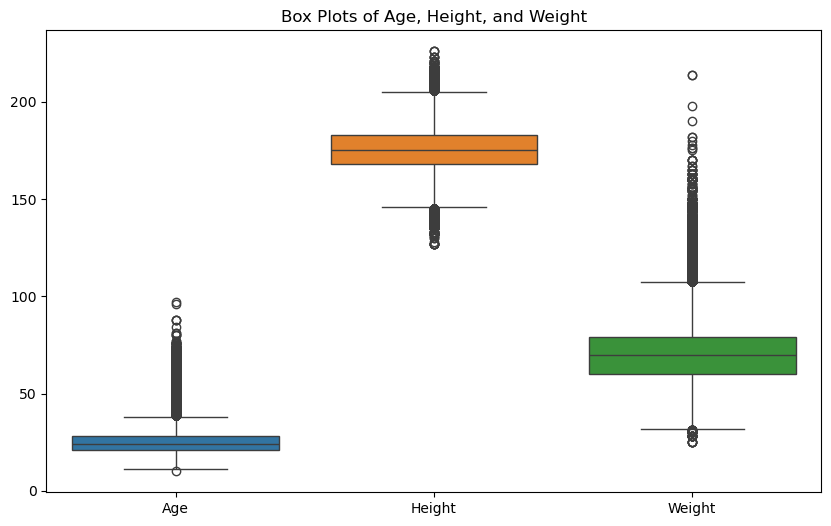

In [15]:
# Box plots for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Height', 'Weight']])
plt.title('Box Plots of Age, Height, and Weight')
plt.show()

- Histogrammes avec KDE

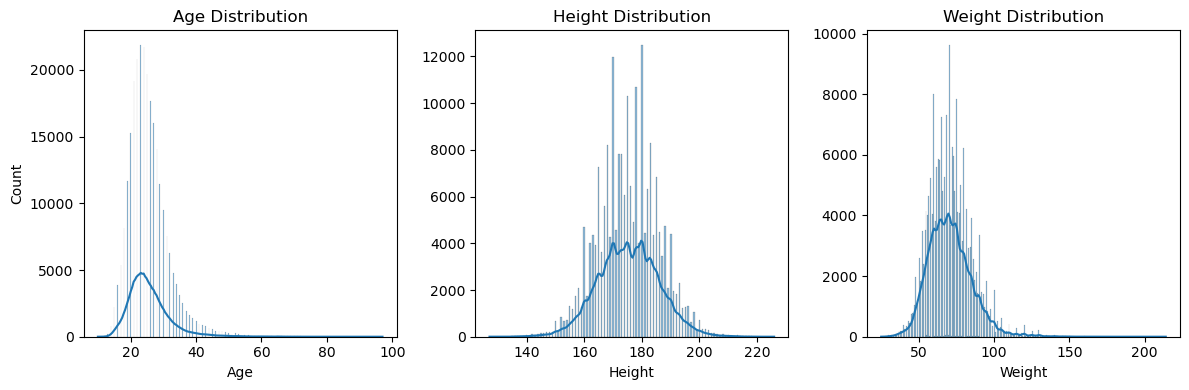

In [16]:
plt.figure(figsize=(12, 4))

# Distribution of age
plt.subplot(1, 3 ,1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
#plt.show()

# Distribution of height
plt.subplot(1, 3 ,2)
sns.histplot(df['Height'], kde=True)
plt.title('Height Distribution')
plt.ylabel("")
#plt.show()

# Distribution of weight
plt.subplot(1, 3 ,3)
sns.histplot(df['Weight'], kde=True)
plt.title('Weight Distribution')
plt.ylabel("")


plt.tight_layout()
plt.show()

### Exploration des variables catégorielles

In [17]:
# Select all columns that are NOT of a numeric type
non_numeric_cols = df.select_dtypes(exclude=np.number).columns

print("Isolated non-numeric variables :")
print(non_numeric_cols)

Isolated non-numeric variables :
Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')


#### Fréquence par genre

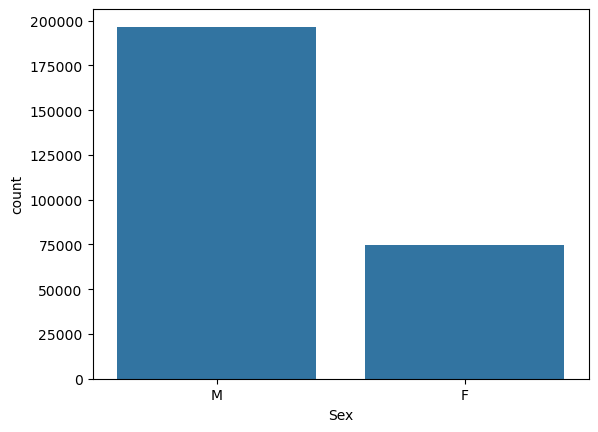

In [18]:
# Distribution of athletes by sex
sns.countplot(x='Sex', data=df)
plt.show()

#### CrossTab et visualisation

- Calculs nombre de médailles par genre

In [19]:
df_medals = df.dropna(subset=['Medal'])

# Group by athlete ID and Sex to count the number of medals per athlete
medals_per_athlete = df_medals.groupby(['ID', 'Sex'])['Medal'].count().reset_index()

# Rename the column for clarity
medals_per_athlete.rename(columns={'Medal': 'TotalMedals'}, inplace=True)

# Create the crosstab between the total medals and the sex of the athlete
crosstab_sex_medals = pd.crosstab(medals_per_athlete['TotalMedals'], medals_per_athlete['Sex'])

# Display the result
print("\nTableau croisé : Total des médailles par athlète et par sexe")
print(crosstab_sex_medals)


Tableau croisé : Total des médailles par athlète et par sexe
Sex             F      M
TotalMedals             
1            5286  15969
2            1353   3261
3             449    924
4             178    353
5              83    132
6              42     71
7              23     30
8              16     23
9              11     12
10              7      8
11              1      4
12              4      4
13              0      4
15              0      1
18              1      0
28              0      1


- Proportions par genre

In [20]:
# Normalize the crosstab by row to get proportions
# axis=0 normalizes by columns, axis=1 normalizes by rows
# We use axis=1 to calculate the proportion of F and M within each 'TotalMedals' group
crosstab_proportions = crosstab_sex_medals.div(crosstab_sex_medals.sum(axis=1), axis=0)

# Set the display format for floats to show as a percentage with no decimal places
#pd.options.display.float_format = '{:.0%}'.format

# Print the crosstab
print("Crosstab: Proportions of male and female athletes by total number of medals")
print(crosstab_proportions)

Crosstab: Proportions of male and female athletes by total number of medals
Sex            F    M
TotalMedals          
1           0.25 0.75
2           0.29 0.71
3           0.33 0.67
4           0.34 0.66
5           0.39 0.61
6           0.37 0.63
7           0.43 0.57
8           0.41 0.59
9           0.48 0.52
10          0.47 0.53
11          0.20 0.80
12          0.50 0.50
13          0.00 1.00
15          0.00 1.00
18          1.00 0.00
28          0.00 1.00


- Visualisation graphique

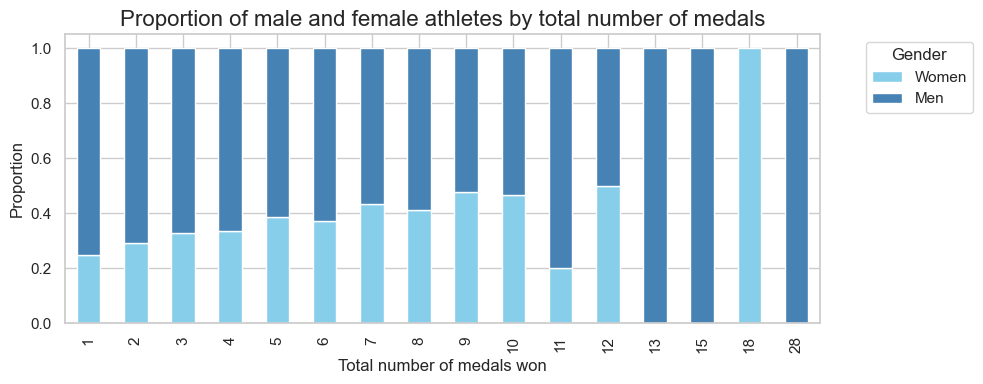

In [21]:
# Set the seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

crosstab_proportions.reset_index(inplace=True)

# Create the plot
#plt.figure(figsize=(15, 6))

# Using `set_index` to make 'TotalMedals' the x-axis
crosstab_proportions.set_index('TotalMedals').plot(kind='bar', figsize=(10, 4), stacked=True, color=['skyblue', 'steelblue'])

# Add titles and labels for good readability
# Title for the plot
plt.title('Proportion of male and female athletes by total number of medals', fontsize=16)
# X-axis label
plt.xlabel('Total number of medals won', fontsize=12)
# Y-axis label
plt.ylabel('Proportion', fontsize=12)

# Position the legend outside the plot
plt.legend(title='Gender', labels=['Women', 'Men'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust plot layout to make sure everything fits
plt.tight_layout()

# Display the plot
plt.show()

## Valeurs manquantes

### Détection

In [22]:
check_missing_values(df)

,valeurs_manquantes_count,valeurs_manquantes_%
Medal,231333,85.33%
Weight,62875,23.19%
Height,60171,22.19%
Age,9474,3.49%


### Préparation des données

#### Heatmap

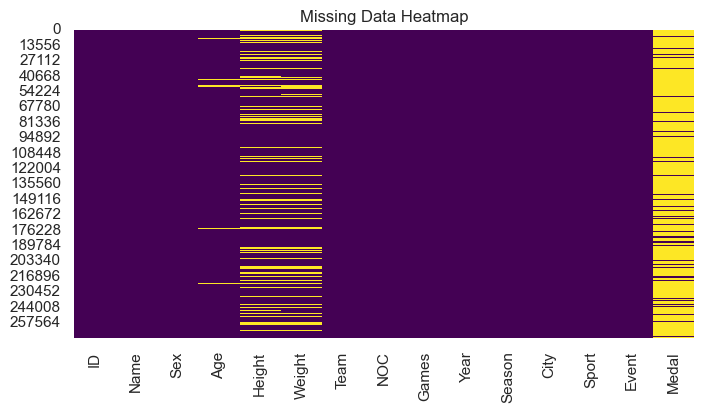

In [23]:
# Visualize missing data using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

*Les valeurs manquantes semblent être de type **MCAR***

#### Calcul IMC

In [24]:
# Create BMI column
df['BMI'] = df['Weight'] / (df['Height'] / 100)**2

# Delete col
df = df.drop(['Weight', 'Height'], axis=1)

df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
BMI        64263
dtype: int64

#### Vérification si valeurs manquantes pour chaque observation d'un même athlète

In [25]:
import time

# The columns to impute
cols_to_check = ['Age', 'BMI']

print("--- Before processing ---")
print("Number of missing values:")
print(df[cols_to_check].isnull().sum())
print("-" * 25)

# --- Start of processing ---
start_time = time.time()

# Fill missing values by group
df_filled = df.groupby('ID')[cols_to_check].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

# Update the original DataFrame
df[cols_to_check] = df_filled

end_time = time.time()
# --- End of processing ---

print("--- After processing ---")
print("Number of missing values:")
print(df[cols_to_check].isnull().sum())
print("-" * 25)
print(f"Processing time: {end_time - start_time:.4f} seconds")

--- Before processing ---
Number of missing values:
Age     9474
BMI    64263
dtype: int64
-------------------------
--- After processing ---
Number of missing values:
Age     9474
BMI    64263
dtype: int64
-------------------------
Processing time: 90.8963 seconds


### Traitement des valeurs manquantes

#### Variable 'Medal'

In [26]:
# Fill missing values in 'Medal' column with 'No Medal'
df['Medal'] = df['Medal'].fillna('No Medal')

df.isnull().sum()

ID            0
Name          0
Sex           0
Age        9474
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
BMI       64263
dtype: int64

#### Dataframe avec ID unique

In [27]:
# Remove duplicates based on the 'ID' column.
# The drop_duplicates() function will keep the first occurrence of each athlete
df_unique_athletes = df.drop_duplicates(subset=['ID'])

# Vérify
duplicate_remaining = df_unique_athletes['ID'].duplicated().any()
print(f"still duplicate remaining ? {duplicate_remaining}")

still duplicate remaining ? False


#### Imputation par la médiane globale

In [28]:
df1 = df_unique_athletes.copy()

# Impute missing values in 'Age' column with the median age
median_age = df1['Age'].median()
df1['Age'] = df1['Age'].fillna(median_age)

# Impute missing values in 'BMI' column with the median height
median_BMI = df1['BMI'].median()
df1['BMI'] = df1['BMI'].fillna(median_BMI)

# Display the number of missing values after imputation
print("\nMissing values after imputation:")
print(df1[['Age', 'BMI']].isnull().sum())


Missing values after imputation:
Age    0
BMI    0
dtype: int64


#### Imputation par la médiane de chaque sport

In [29]:
df2 = df_unique_athletes.copy()

# Impute missing values using the median of each sport category
df2['Age'] = df2['Age'].fillna(df2.groupby('Sport')['Age'].transform('median'))
df2['BMI'] = df2['BMI'].fillna(df2.groupby('Sport')['BMI'].transform('median'))

# Fill the remaining missing values with the global median
df2['BMI'] = df2['BMI'].fillna(df2['BMI'].median())


# Display the number of missing values after imputation
print("\nMissing values after imputation:")
print(df2[['Age', 'BMI']].isnull().sum())


Missing values after imputation:
Age    0
BMI    0
dtype: int64


#### Imputation par la médiane de chaque genre

In [30]:
df3 = df_unique_athletes.copy()

# Impute missing values using the median by sex
df3["Age"] = df3['Age'].fillna(df3.groupby('Sex')['Age'].transform('median'))
df3['BMI'] = df3['BMI'].fillna(df3.groupby('Sex')['BMI'].transform('median'))


# Display the number of missing values after imputation
print("\nMissing values after imputation:")
print(df3[['Age', 'BMI']].isnull().sum())


Missing values after imputation:
Age    0
BMI    0
dtype: int64


#### Imputation par modélisation simple (KNN Imputer)

- Encodage data

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

df4 = df_unique_athletes.copy()

# 1. Separate columns
col_df4 = list(df4.columns)
col_to_encode = ['Sport', 'Sex', 'Season']
other_col = list(set(col_df4) - set(col_to_encode))

# 2. Apply One-Hot Encoding to choisen columns
# The encoder transforms categorical features into a one-hot encoded array.
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(df4[col_to_encode])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(col_to_encode))

# 3. Combine the numerical and encoded dataframes
df_combined = pd.concat([df[other_col], encoded_df], axis=1)

In [32]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 81 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               271116 non-null  int64  
 1   City                             271116 non-null  object 
 2   Year                             271116 non-null  int64  
 3   Name                             271116 non-null  object 
 4   Team                             271116 non-null  object 
 5   Games                            271116 non-null  object 
 6   BMI                              206853 non-null  float64
 7   Age                              261642 non-null  float64
 8   Medal                            271116 non-null  object 
 9   Event                            271116 non-null  object 
 10  NOC                              271116 non-null  object 
 11  Sport_Aeronautics                135571 non-null  float64
 12  Sp

- KNN Imputer

In [33]:
# --- Start of processing ---
start_time = time.time()

# Initialize the imputer
imputer = KNNImputer(n_neighbors=3)

# The columns to be imputed are 'Age'and 'BMI'
cols_to_impute = ['Age', 'BMI']

# Impute missing values
df_combined[cols_to_impute] = imputer.fit_transform(df_combined[cols_to_impute])

# Integration of imputed data
df4[cols_to_impute] = df_combined[cols_to_impute]

end_time = time.time()
# ---End of processing du traitement ---

print("-" * 25)
print("\nMissing values AFTER processing:")
print(df4.isnull().sum())

print("-" * 25)
print(f"Execution time of the process : {end_time - start_time:.4f} seconds")

-------------------------

Missing values AFTER processing:
ID        0
Name      0
Sex       0
Age       0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
BMI       0
dtype: int64
-------------------------
Execution time of the process : 926.2553 seconds


#### Comparatif résultats

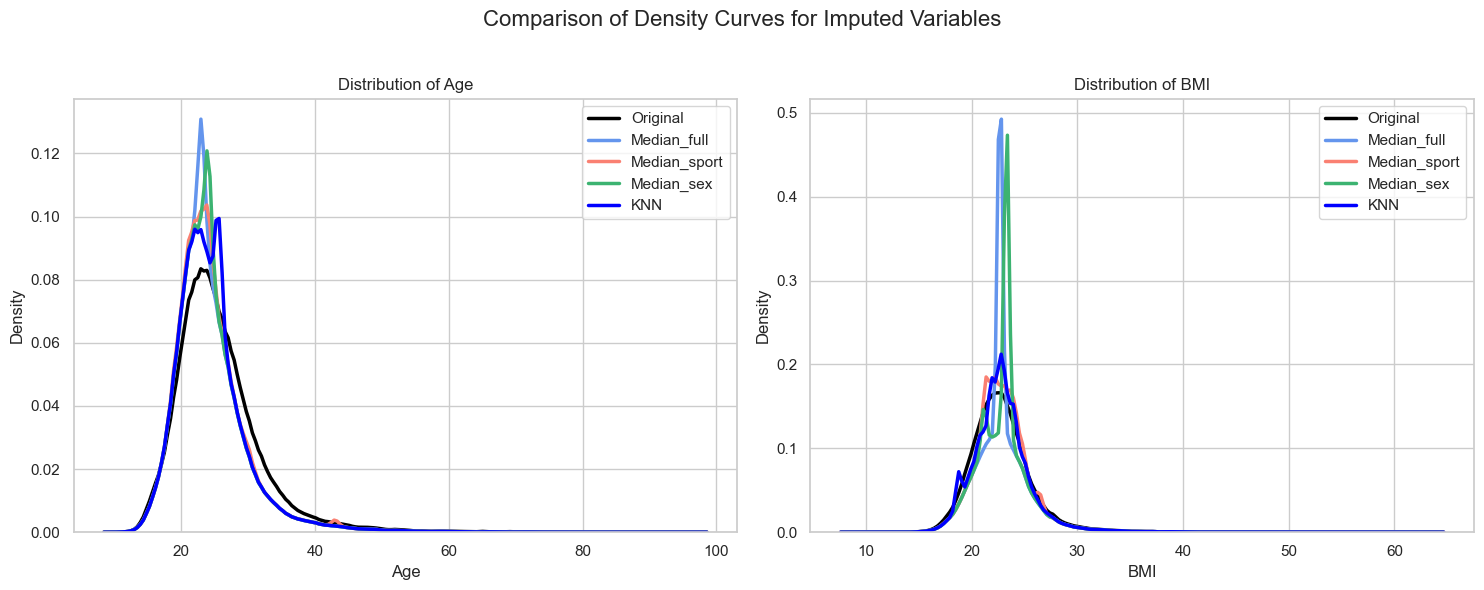

In [34]:
# set variables
variables = ['Age', 'BMI']
dfs = {
    'Original': df,
    'Median_full': df1,
    'Median_sport': df2,
    'Median_sex': df3,
    'KNN': df4
}

# Define a distinctive color palette
# Using a dictionary is a good practice to associate each method name with a color
color_palette = {
    'Original': 'black',
    'Median_full': 'cornflowerblue', # Light blue
    'Median_sport': 'salmon',        # Red-orange
    'Median_sex': 'mediumseagreen',  # Medium green
    'KNN': 'blue'              # blue
}

# Create charts for each variable
fig, axes = plt.subplots(1, len(variables), figsize=(15, 6))
plt.suptitle('Comparison of Density Curves for Imputed Variables', fontsize=16)

for i, var in enumerate(variables):
    ax = axes[i]
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')

    # Plot the distributions
    for name, df_imputed in dfs.items():
        # Use the color defined in the palette
        color = color_palette.get(name, 'gray')  # Use 'gray' by default if the color is not found
        sns.kdeplot(data=df_imputed, x=var, ax=ax, label=name, linewidth=2.5, color=color)

    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

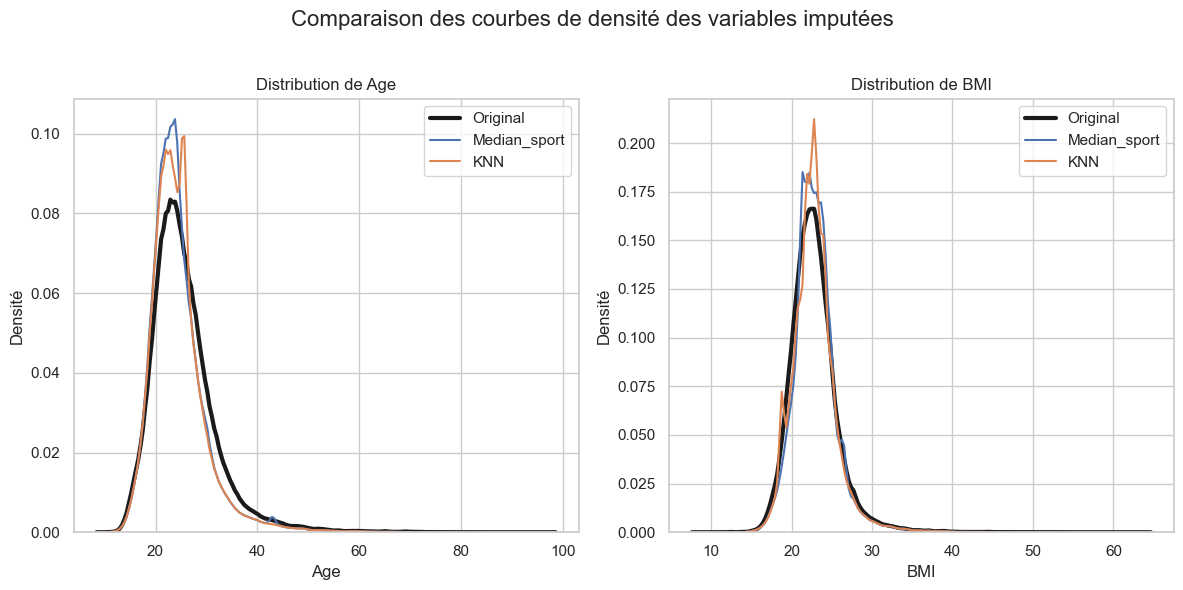

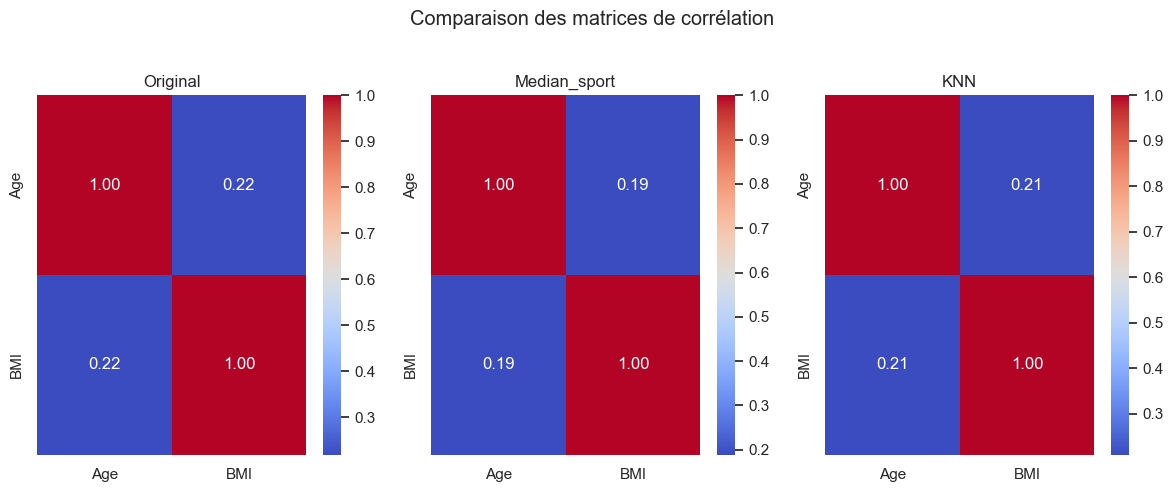

In [35]:
variables = ['Age', 'BMI']
dfs = {
    'Original': df,
    'Median_sport': df2,
    'KNN': df4
}

# Create charts for each variable
fig, axes = plt.subplots(1, len(variables), figsize=(12, 6))
plt.suptitle('Comparaison des courbes de densité des variables imputées', fontsize=16)

for i, var in enumerate(variables):
    ax = axes[i]
    ax.set_title(f'Distribution de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Densité')

    # Original distribution
    sns.kdeplot(data=dfs['Original'], x=var, ax=ax, label='Original', linewidth=3, color='k')
    
    # Other distributions
    for name, df_imputed in dfs.items():
        if name != 'Original':
            sns.kdeplot(data=df_imputed, x=var, ax=ax, label=name)

    ax.legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Comparison of correlation
fig, axes = plt.subplots(1, len(dfs), figsize=(12, 5))
plt.suptitle('Comparaison des matrices de corrélation')
for i, (name, df_imputed) in enumerate(dfs.items()):
    corr_matrix = df_imputed[variables].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'{name}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### test

In [36]:
variables = ['Age', 'BMI']
imputed_dfs = {
    'Median': df1,
    'Median_Sport': df2,
    'Median_Sex': df3,
    'KNN': df4
}
stats_names = ['skew']
results = {}

# function to calculate skew
def get_stats(df_test):
    df_num = df_test[variables]
    stats = df_num.describe().T
    stats['skew'] = df_num.skew()
    return stats[['skew']]

# Original skew
non_missing_data = df_unique_athletes.dropna()
stats_original = get_stats(non_missing_data)

# Percentage difference calculation
for method, df_temp in imputed_dfs.items():
    stats_imputed = get_stats(df_temp)
    # Calcul de la différence relative en pourcentage
    diff_df = ((stats_imputed - stats_original) / stats_original) * 100
    results[method] = diff_df.stack()

# 4. Create dataframe
comparison_df = pd.DataFrame(results).T.round(2)
comparison_df.index.name = 'Method'

print("--- Différences en % par rapport à la distribution originale ---")
comparison_df

--- Différences en % par rapport à la distribution originale ---


,Age,BMI
,skew,skew
Method,,
Median,60.05,22.17
Median_Sport,55.15,6.43
Median_Sex,58.93,10.51
KNN,55.27,2.99


#### Conclusion

*Pour traiter les valeurs manquantes, nous retenons la technique d'imputation par le KNN Imputer*

In [37]:
# columns to update
col_to_update = df4[['ID', 'Age', 'BMI']]

# Using the merge method
df_final = pd.merge(df.drop(columns=['Age', 'BMI']), col_to_update, on='ID', how='left')

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Team    271116 non-null  object 
 4   NOC     271116 non-null  object 
 5   Games   271116 non-null  object 
 6   Year    271116 non-null  int64  
 7   Season  271116 non-null  object 
 8   City    271116 non-null  object 
 9   Sport   271116 non-null  object 
 10  Event   271116 non-null  object 
 11  Medal   271116 non-null  object 
 12  Age     271116 non-null  float64
 13  BMI     271116 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 29.0+ MB


In [38]:
df_final.isnull().sum()

ID        0
Name      0
Sex       0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Age       0
BMI       0
dtype: int64

#### Sauvegarde cleaned data

In [39]:
# Define the file name and the path to the backup directory
data_without_missing_files = df_final.copy()
my_file = 'data_without_missing_files.csv'
backup_directory = '../DATA/'

# Create the full file path
full_path = os.path.join(backup_directory, my_file)

# Save the DataFrame to a CSV file
df_final.to_csv(full_path, index=False)

print(f"The file '{my_file}' has been successfully saved to the '{backup_directory}' directory.")

The file 'data_without_missing_files.csv' has been successfully saved to the '../DATA/' directory.


## Valeurs aberrantes

#### Les données

In [40]:
# Load the dataset
data = pd.read_csv('../DATA/data_without_missing_files.csv')

df = data.copy()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Team    271116 non-null  object 
 4   NOC     271116 non-null  object 
 5   Games   271116 non-null  object 
 6   Year    271116 non-null  int64  
 7   Season  271116 non-null  object 
 8   City    271116 non-null  object 
 9   Sport   271116 non-null  object 
 10  Event   271116 non-null  object 
 11  Medal   271116 non-null  object 
 12  Age     271116 non-null  float64
 13  BMI     271116 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 29.0+ MB


#### Exploration

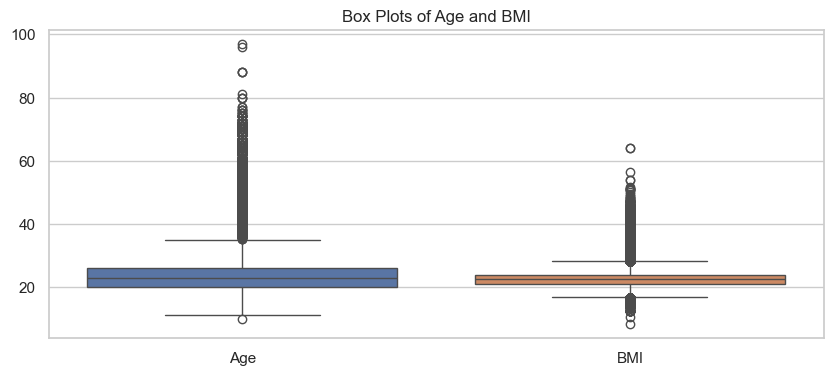

In [42]:
# Box plots for each numerical column
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Age', 'BMI']])
plt.title('Box Plots of Age and BMI')
plt.show()

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.00,68248.95,39022.29,1.00,34643.00,68205.00,102097.25,135571.00
Year,271116.00,1978.38,29.88,1896.00,1960.00,1988.00,2002.00,2016.00
Age,271116.00,23.77,5.61,10.00,20.00,23.00,26.00,97.00
BMI,271116.00,22.69,2.69,8.36,21.04,22.55,23.94,63.90


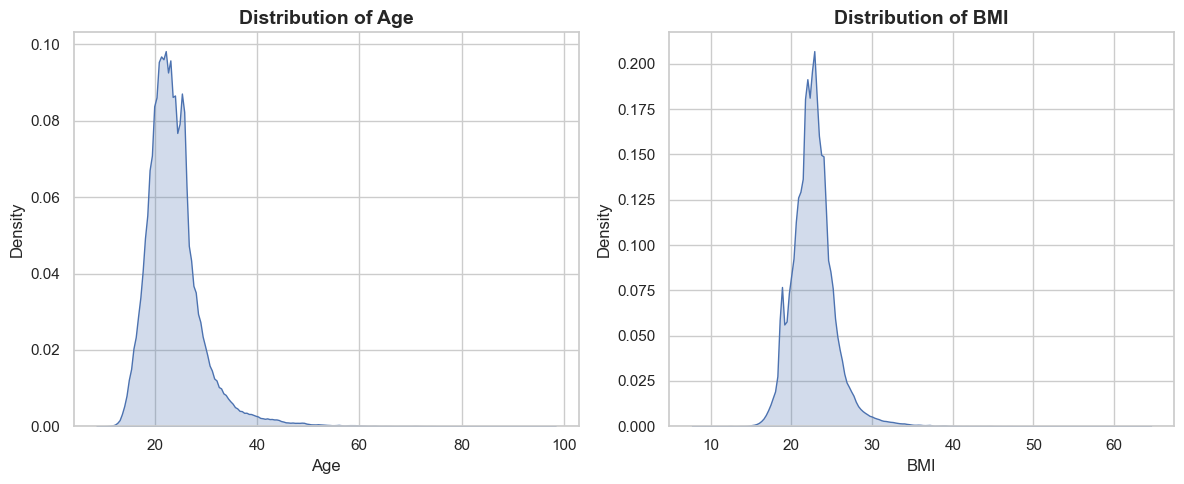

In [44]:
# --- Plotting the distributions ---
# Set the plotting style for a better visual
sns.set_style("whitegrid")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot for 'Age' ---
# Plot the KDE distribution for the 'Age' column
sns.kdeplot(data=df, x='Age', fill=True, ax=axes[0])
# Set the title and labels for the first plot
axes[0].set_title('Distribution of Age', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# --- Plot for 'BMI' ---
# Plot the KDE distribution for the 'BMI' column
sns.kdeplot(data=df, x='BMI', fill=True, ax=axes[1])
# Set the title and labels for the second plot
axes[1].set_title('Distribution of BMI', fontsize=14, fontweight='bold')
axes[1].set_xlabel('BMI', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plots
plt.show()

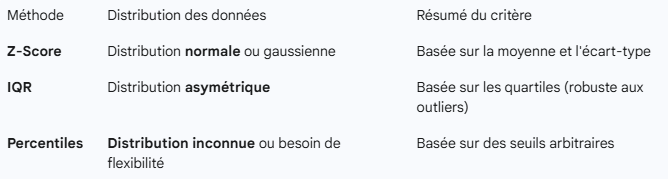

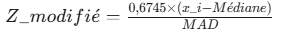

**Nous choisissons la technique IQR pour la détection et la méthode d'imputation par la médiane pour le traitement**

#### Détection et traitement

In [45]:
def handle_outliers_iqr_imputation(df, columns, action='median_impute', threshold=1.5):
    """
    Detects and replaces outliers in one or more DataFrame columns using the
    IQR method, with an option to impute them with the median.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names to analyze.
        action (str): The action to perform.
                      - 'detect': returns a dictionary with the count of outliers per column.
                      - 'median_impute': returns the DataFrame with outliers replaced by the column's median.
                      
        threshold (int or float): The IQR threshold (default is 1.5).

    Returns:
        dict or pd.DataFrame: Depends on the value of 'action'.
    """
    if action not in ['detect', 'median_impute']:
        raise ValueError("The 'action' must be 'detect' or 'median_impute'.")

    outlier_counts = {}

    for col in columns:
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in the DataFrame. Skipping.")
            continue
        
        # Calculate IQR and bounds
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        
        # Identify outliers
        is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)
        
        if action == 'detect':
            outlier_counts[col] = is_outlier.sum()
            print(f"{is_outlier.sum()} outliers for {col} variable")
        
        elif action == 'median_impute':
            # Calculate the median of the non-outlier values
            median_val = df.loc[~is_outlier, col].median()
            
            # Replace outliers with the median
            df.loc[is_outlier, col] = median_val
            
            print(f"The outliers for the variable {col} have been successfully handled.")
            print(f"Outliers were replaced with the median ({median_val}).")

In [46]:
handle_outliers_iqr_imputation(df, ['Age', 'BMI'], 'detect')

9634 outliers for Age variable
9037 outliers for BMI variable


In [47]:
handle_outliers_iqr_imputation(df, ['Age', 'BMI'], 'median_impute')

The outliers for the variable Age have been successfully handled.
Outliers were replaced with the median (23.0).
The outliers for the variable BMI have been successfully handled.
Outliers were replaced with the median (22.484148991198825).


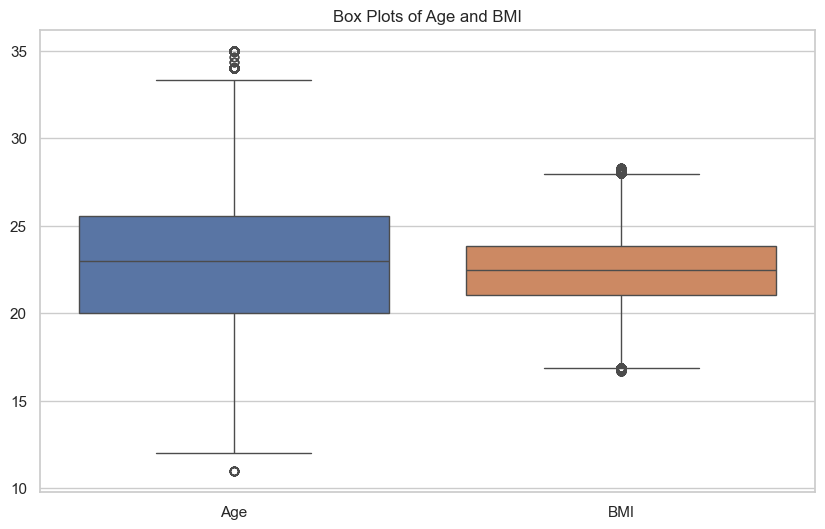

In [48]:
# Box plots for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'BMI']])
plt.title('Box Plots of Age and BMI')
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Team    271116 non-null  object 
 4   NOC     271116 non-null  object 
 5   Games   271116 non-null  object 
 6   Year    271116 non-null  int64  
 7   Season  271116 non-null  object 
 8   City    271116 non-null  object 
 9   Sport   271116 non-null  object 
 10  Event   271116 non-null  object 
 11  Medal   271116 non-null  object 
 12  Age     271116 non-null  float64
 13  BMI     271116 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 29.0+ MB


#### Sauvegarde cleaned data

In [50]:
# Define the file name and the path to the backup directory
data_without_missing_files = df.copy()
my_file = 'data_cleaned.csv'
backup_directory = '../DATA/'

# Create the full file path
full_path = os.path.join(backup_directory, my_file)

# Save the DataFrame to a CSV file
df.to_csv(full_path, index=False)

print(f"The file '{my_file}' has been successfully saved to the '{backup_directory}' directory.")

The file 'data_cleaned.csv' has been successfully saved to the '../DATA/' directory.
